<a href="https://colab.research.google.com/github/101kbps/exercicios/blob/main/desafio1_igti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
import pandas as pd #importando biblioteca e tratamento de dataframe




In [351]:
#ler o arquivo importado (estados brasileiros)
estados = pd.read_csv('estados_brasileiros.csv', sep = ';' , encoding ='latin-1')

In [352]:
estados.head() #visualizar os primeiros itens do BD

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [353]:
#coletar os dados dos clientes
clientes = pd.read_excel('dados_clientes.xlsx')
#visualizar os dados do bd de clientes
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [354]:
#coletando os dados de idade dos clientes 
idade= pd.read_csv('idade_clientes.csv' , sep =';' , encoding ='latin-1')
#visualizando as informações iniciais no BD
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [355]:
#PREPARANDO OS DADOS

#analisando as variaveis da base de dados

clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [356]:
clientes.describe()
#temos a quantidade(count),a média (mean),o desvio padrão (std), o valor minimo(min) e o valor maximo (max)

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [357]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [358]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [359]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [360]:
#Analisando os dados ausentes

#Verificando dados ausentes ou nulos na base (usando is NA)
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [361]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [362]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [363]:
#verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [364]:
#SÃO 3 OPÇÕES PARA O TRATAMENTO DOS DADOS
# EXCLUIR OS DADOS AUSENTES
# CALCULAR A MÉDIA DOS DADOS (SOMAR E DIVIDIR PELA QTDE DE DADOS)
# CALCULAR A MEDIANA DOS DADOS (A MEDIDA QUE PEGA O VALOR CENTRAL ENTRE OS EXTREMOS)

In [365]:
#EXCLUINDO OS DADOS AUSENTES

clientes.dropna(subset=['peso'],inplace= True) #elimina o registro dos pesos nulos .
# inplace = true quer dizer que quer alterar os dados naquele dataframe

In [366]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [367]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [368]:
#alterando dados para outras medidas
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


In [369]:
#Realizando a média e a mediana da variável peso
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [370]:
#verificando valores
print(f"O valor da média dos pesos é:{media}\nO valor da mediana é {mediana}")


O valor da média dos pesos é:143.4409594095941
O valor da mediana é 140.0


In [371]:
# Fazendo o arredondamento da variável média
round(media,2)

143.44

In [372]:
# Preenchendo os valores ausentes pela média
#clientes.peso.fillna(round(media,2),inplace=True)

In [373]:
#Verificando se existe algum valor ausente
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [374]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [375]:
#SUBSTITUINDO VARIÁVEL CATEGÓRICA 

In [376]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [377]:
#estados.pais.fillna('Brasil',inplace = True)
estados.dropna(subset=['pais'],inplace = True)

In [378]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [379]:
#ANALISANDO A DISTRIBUIÇÃO DE DADOS


In [380]:
import matplotlib.pyplot as plt

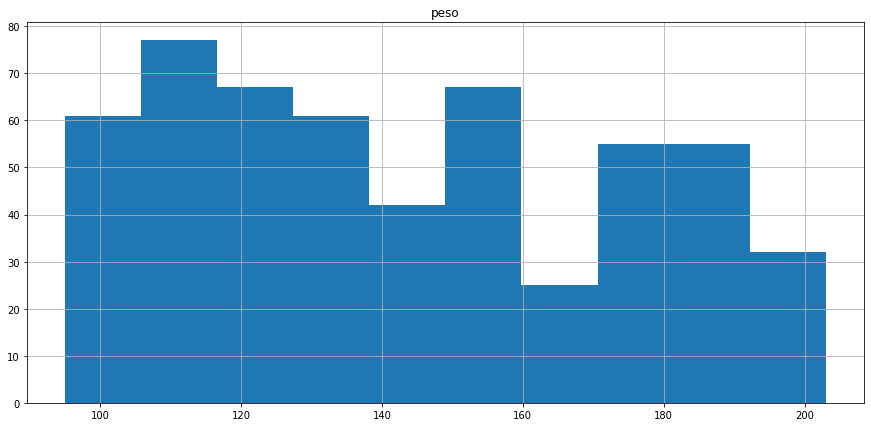

In [381]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

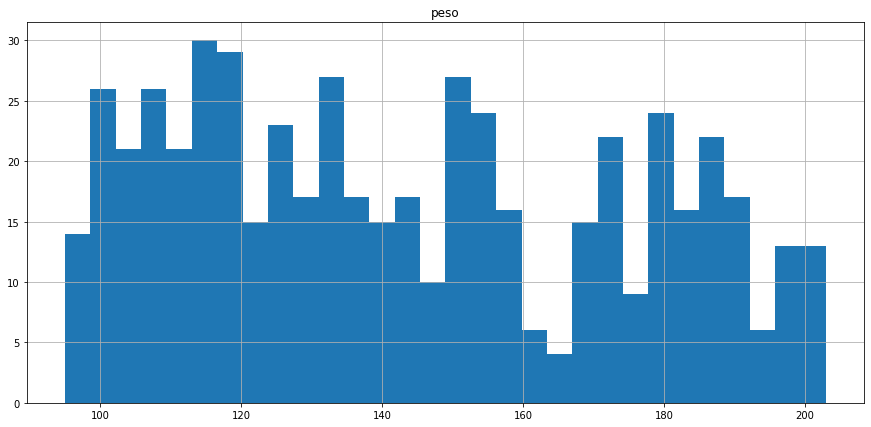

In [382]:
clientes.hist(column='peso',figsize=(15,7),bins=30)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d87564650>]],
      dtype=object)

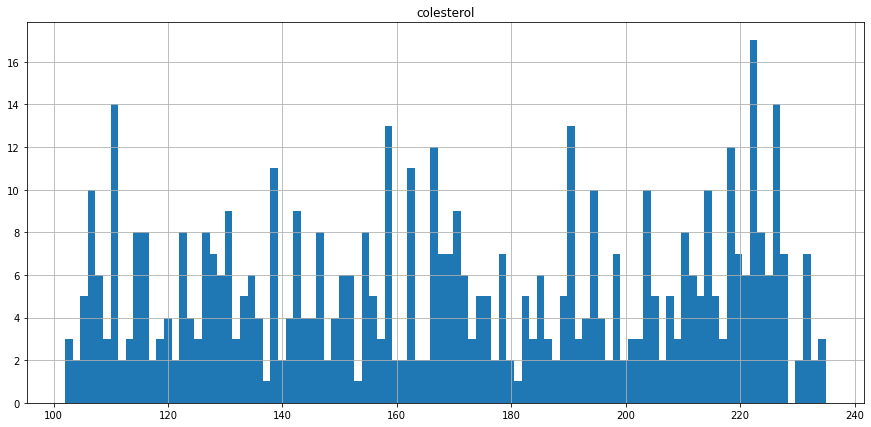

In [383]:
clientes.hist(column='colesterol', figsize =(15,7), bins=100)

In [384]:
#criando um identificador pra variavel genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [385]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d8758a7d0>]],
      dtype=object)

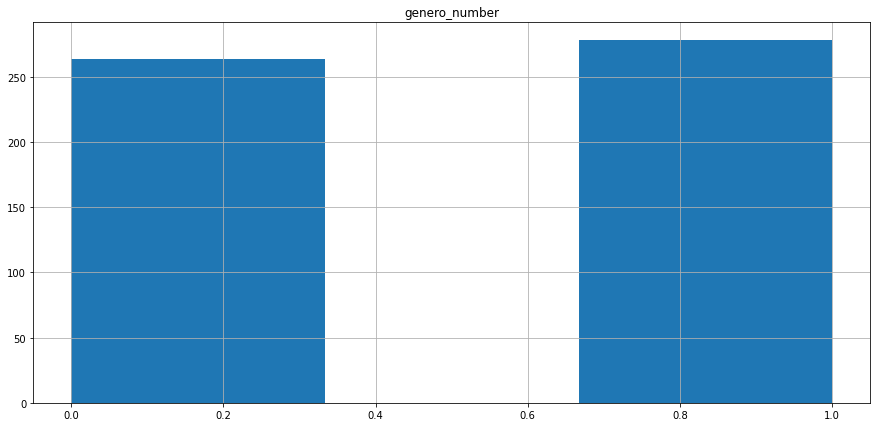

In [386]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

In [387]:
#JUNÇÃO ENTRE OS DADOS COLETADOS (através do campo comum às tabelas, no exemplo abaixo,o id_estado)

In [388]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [389]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [390]:
clientes_estados= pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [391]:
#Realiza a junção entre clientes e idades (pelo id_cliente)

In [392]:
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [393]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [394]:
base_completa.reset_index(drop=True) #ordenando o indice

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [395]:
#Organizando a base de dados

In [396]:
#alterando o nome das colunas
base_completa.rename(columns={'id_cliente':'cod_cliente', 'genero_number':'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [397]:
#Alterando as linhas da variavel sigla_estado (para caixa alta)
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [398]:
#inserindo alteração realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [399]:
#ALTERANDO DISPOSIÇÃO DAS COLUNAS DO ARQUIVO DE DADOS (para facilitar a visualização)

In [400]:
base_completa[['cod_cliente','cod_genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']]

,cod_cliente,cod_genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,1,17,102.0,111,23,Roraima,RR,Brasil
17,2,1,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,1,62,115.0,136,4,Amazonas,AM,Brasil
64,5,1,44,130.0,158,26,Sergipe,SE,Brasil
83,6,1,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,1,20,172.0,207,22,Rondônia,RO,Brasil
430,544,1,66,129.0,157,1,Acre,AC,Brasil
155,545,1,36,107.0,115,6,Ceará,CE,Brasil
372,546,1,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [401]:
base_completa = base_completa[['cod_cliente','cod_genero','idade','peso','colesterol','id_estado','estado','sigla_estado','pais']].reset_index(drop=True)

In [402]:
base_completa

,cod_cliente,cod_genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,1,17,102.0,111,23,Roraima,RR,Brasil
1,2,1,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,1,62,115.0,136,4,Amazonas,AM,Brasil
3,5,1,44,130.0,158,26,Sergipe,SE,Brasil
4,6,1,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,1,20,172.0,207,22,Rondônia,RO,Brasil
494,544,1,66,129.0,157,1,Acre,AC,Brasil
495,545,1,36,107.0,115,6,Ceará,CE,Brasil
496,546,1,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [403]:
#ANÁLISE DOS DADOS

In [404]:
#MÉTODO DO COTOVELO

from sklearn.cluster import KMeans

In [405]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters = k, random_state=0)
        kmeans.fit(X=dados_cliente)
        wcss.append(kmeans.inertia_)
    return wcss

In [406]:
dados_cliente = base_completa[['peso','colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [407]:
wcss_clientes = calcular_wcss(dados_cliente)

In [408]:
type(wcss_clientes)

list

In [409]:
#visualizando os dados obtidos no wcss
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de : {wcss_clientes[i]}')
  

O cluster 0 possui valor de WCSS de : 1248240.6686746986
O cluster 1 possui valor de WCSS de : 298932.7377352369
O cluster 2 possui valor de WCSS de : 127842.60787249672
O cluster 3 possui valor de WCSS de : 73809.93553059456
O cluster 4 possui valor de WCSS de : 49068.8738718445
O cluster 5 possui valor de WCSS de : 34064.50002100837
O cluster 6 possui valor de WCSS de : 25079.92393550797
O cluster 7 possui valor de WCSS de : 20378.05126656164
O cluster 8 possui valor de WCSS de : 16003.657266380145
O cluster 9 possui valor de WCSS de : 13385.38391038145


In [410]:
#VISUALIZANDO O GRAFICO DE COTOVELO

In [411]:
import plotly.express as px #criação de grafico dinamicos
import plotly.offline as py
import plotly.graph_objects as go #para concatenização dos graficos

In [412]:
grafico_wcss = px.line( x = range(1,11),
                        y= wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title = 'Calculando o WCSS',
                  xaxis_title = 'Número de Clusters',
                  yaxis_title = 'Valor do WCSS',
                  template = 'plotly_white'
                  )
fig.show()

In [413]:
kmeans_clientes = KMeans(n_clusters = 4, random_state = 0) #para 4 clusters
base_completa['cluster']= kmeans_clientes.fit_predict(dados_cliente)

In [414]:
base_completa

,cod_cliente,cod_genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,1,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,1,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,1,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,1,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,1,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,1,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,1,66,129.0,157,1,Acre,AC,Brasil,1
495,545,1,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,1,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


In [415]:
#CALCULANDO OS CENTROIDES DE CADA CLUSTER

In [416]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [417]:
dados_cliente

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227
...,...,...
493,172.0,207
494,129.0,157
495,107.0,115
496,117.0,147


In [438]:
#visualizando os 4 clusters no gráfico

grafico = px.scatter(x= base_completa['peso'],
                        y = base_completa['colesterol'],
                        color=base_completa['cluster'])
grafico_centroide = px.scatter(x= centroides_clusters[:,0], y= centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

In [419]:
#VISUALIZANDO E ALTERANDO O LAYOUT DO GRÁFICO 

In [420]:
grafico = px.scatter(x= base_completa['colesterol'],
                     y= base_completa['peso'],
                     color= base_completa['cluster'])
fig= go.Figure(grafico)
fig.update_layout(title='Análise de Clusters',
                  xaxis_title='Colesterol',
                  yaxis_title= 'Peso',
                  )
fig.show()


In [421]:
#criando funções ára gerar gráficos 

In [422]:
def plotar_grafico(x,y,xlabel,ylabel):
    grafico = px.scatter(x=x,
                         y=y,
                         color= base_completa['cluster'])
    fig=go.Figure(grafico)

    fig.update_layout(title='Análise de Clusters',
                      xaxis_title= xlabel,
                      yaxis_title =ylabel,
                      )
    fig.show()

In [423]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol','peso')

In [449]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'],'peso','colesterol')

In [425]:
plotar_grafico(base_completa['idade'],base_completa['colesterol'],'idade','colesterol')

In [426]:
#SEGMENTANDO OS CLIENTES BASEADO NA ANALISE DOS CLUSTERS
#ou seja, analisar os dados dos clusters referente aos atributos peso e colesterol e nomear os agrupamentos
#Alto risco: Peso e colesterol altos
#Baixo risco: Peso e colesterol baixos
#Moderado : Peso e colesterol medianos

In [448]:
x='colesterol'
y='peso'

plotar_grafico(base_completa[x],base_completa[y],x,y)

In [428]:
cluster_clientes = base_completa

In [441]:
#Segmentando os clientes baseado na analise dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster']="Alto Risco"
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster']="Baixo Risco"
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster']="Risco Moderado Baixo"
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster']="Risco Moderado Alto"

In [442]:
cluster_clientes

,cod_cliente,cod_genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,1,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,1,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,1,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,1,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado Baixo
4,6,1,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,1,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,1,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado Baixo
495,545,1,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo Risco
496,546,1,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado Baixo


In [431]:
#ANÁLISE DE CLUSTERS CRIADOS


In [443]:
#verifica os valores de idade por cliente
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo Risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado Alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado Baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [454]:
#verifica os valores de estado por cluster
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,142,25,Rio Grande do Sul,10
Baixo Risco,129,25,Amazonas,10
Risco Moderado Alto,106,25,Pernambuco,7
Risco Moderado Baixo,121,25,Sergipe,9


In [446]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado Alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado Baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [447]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [464]:
cluster_clientes.query('nome_cluster == "Risco Moderado Alto" & cod_genero == 0').describe()

,cod_cliente,cod_genero,idade,peso,colesterol,id_estado,cluster
count,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.0
mean,281.220339,0.0,42.271186,152.135593,186.152542,13.169492,3.0
std,158.627309,0.0,14.904096,7.300112,10.182496,7.808379,0.0
min,8.000000,0.0,16.000000,140.000000,168.000000,1.000000,3.0
25%,137.500000,0.0,29.500000,145.000000,176.000000,6.000000,3.0
50%,292.000000,0.0,43.000000,154.000000,189.000000,13.000000,3.0
75%,414.500000,0.0,52.500000,157.000000,194.500000,19.000000,3.0
max,534.000000,0.0,70.000000,169.000000,201.000000,27.000000,3.0


In [450]:
cluster_clientes.groupby(['nome_cluster','cod_genero'])['peso'].describe()

count        mean        std    min     25%  \
nome_cluster         cod_genero                                                
Alto Risco           0            60.0  185.983333   8.032754  168.0  180.00   
                     1            82.0  183.109756  10.743940  167.0  173.25   
Baixo Risco          0            58.0  108.396552   6.472451   96.0  104.00   
                     1            71.0  105.690141   5.953610   95.0  101.50   
Risco Moderado Alto  0            59.0  152.135593   7.300112  140.0  145.00   
                     1            47.0  152.553191   6.730232  140.0  148.00   
Risco Moderado Baixo 0            63.0  129.317460   7.079788  116.0  125.00   
                     1            58.0  125.672414   6.383608  115.0  120.25   

                                   50%     75%    max  
nome_cluster         cod_genero                        
Alto Risco           0           186.0  192.00  203.0  
                     1           182.0  189.75  203.0  
Baixo Risco          0           110.0  113.00  118.0  
                     1           105.0  110.00  118.0  
Risco Moderado Alto  0           154.0  157.00  169.0  
                     1           151.0  154.50  168.0  
Risco Moderado Baixo 0           129.0  135.00  142.0  
                     1           125.5  131.00  140.0

In [451]:
cluster_clientes.groupby(['nome_cluster','cod_genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         cod_genero                                                
Alto Risco           0            60.0  220.650000   6.456701  204.0  216.75   
                     1            82.0  217.768293   8.939162  204.0  211.00   
Baixo Risco          0            58.0  122.448276  10.372319  102.0  113.00   
                     1            71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado Alto  0            59.0  186.152542  10.182496  168.0  176.00   
                     1            47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado Baixo 0            63.0  156.571429   9.596226  138.0  149.00   
                     1            58.0  151.637931   9.389614  138.0  143.25   

                                   50%    75%    max  
nome_cluster         cod_genero                       
Alto Risco           0           221.0  225.0  235.0  
                     1           219.0  225.0  235.0  
Baixo Risco          0           124.5  130.0  138.0  
                     1           115.0  126.0  136.0  
Risco Moderado Alto  0           189.0  194.5  201.0  
                     1           184.0  192.5  203.0  
Risco Moderado Baixo 0           156.0  166.0  171.0  
                     1           151.5  158.0  168.0

In [436]:
#EXPORTANDO DADOS


In [437]:
cluster_clientes.to_csv('classificacao_clientes.csv',sep=';',encoding='latin-1')

In [465]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado,genero_number
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738,0.512915
std,158.194932,30.836868,39.185218,7.604659,0.500295
min,1.000000,95.000000,102.000000,1.000000,0.000000
25%,138.250000,116.000000,136.000000,7.000000,0.000000
50%,276.500000,140.000000,169.000000,13.000000,1.000000
75%,411.750000,171.000000,207.750000,20.000000,1.000000
max,547.000000,203.000000,235.000000,27.000000,1.000000
